# Build efficiency curves using TDCRPy

In [ ]:
pip install TDCRPy --upgrade

In [2]:
import tdcrpy as td
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
mode = "eff"                # ask for efficiency calculation
mode2 = "sym"               # specify that symmetric PMTs is considered
TD = 0.977667386529166      # TDCR parameter
TAB = 0.992232838598821     # TDCR parameter (AB)
TBC = 0.992343419459002     # TDCR parameter (BC)
TAC = 0.99275350064608      # TDCR parameter (AC)
Rad="Co-60"                 # radionuclides
pmf_1="1"                   # relatives fractions of the radionulides
N = 1000                     # number of Monte Carlo trials
kB =1.0e-5                  # Birks constant in cm keV-1
V = 10                      # volume of scintillator in mL
L=np.logspace(-3,2,num=100) # free parameter in keV-1

effD, u_effD, effT, u_effT = [], [], [], []
for l in tqdm(L):
  out = td.TDCRPy.TDCRPy(l, TD, TAB, TBC, TAC, Rad, pmf_1, N, kB, V, mode, mode2, barp=False)
  effD.append(out[2])
  u_effD.append(out[3])
  effT.append(out[4])
  u_effT.append(out[5])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [32:01<00:00, 19.22s/it]


Text(0, 0.5, '$\\epsilon_D$')

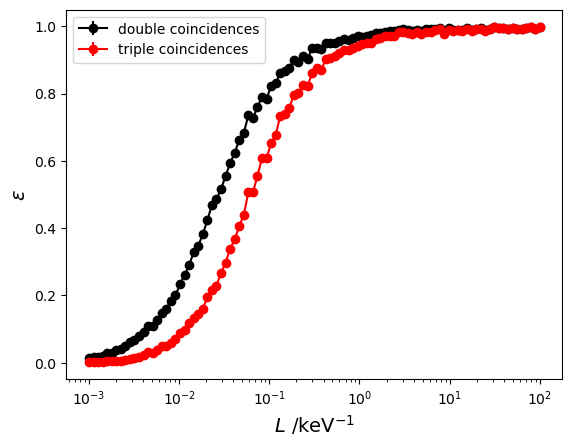

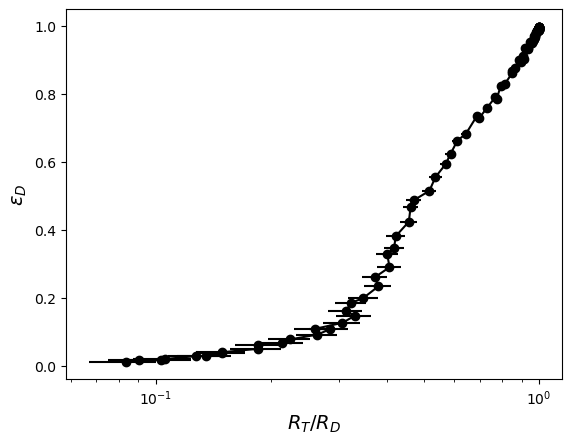

In [4]:
effT=np.asarray(effT)
effD=np.asarray(effD)
u_effT=np.asarray(u_effT)
u_effD=np.asarray(u_effD)

tdcr=effT/effD
u_tdcr=np.sqrt(u_effD**2*effT**2/effD**4+u_effT**2/effD**2)

plt.figure("efficiency vs free parameter")
plt.clf()
plt.errorbar(L,effD,yerr=u_effD,fmt="-ok",label="double coincidences")
plt.errorbar(L,effT,yerr=u_effT,fmt="-or",label="triple coincidences")
plt.xscale('log')
plt.xlabel(r'$L$ /keV$^{-1}$', fontsize=14)
plt.ylabel(r'$\epsilon$', fontsize=14)
plt.legend()

plt.figure("efficiency vs TDCR")
plt.clf()
plt.errorbar(tdcr,effD,xerr=u_tdcr,yerr=u_effD,fmt="-ok")
plt.xscale('log')
plt.xlabel(r'$R_T/R_D$', fontsize=14)
plt.ylabel(r'$\epsilon_D$', fontsize=14)